# Flight_Delay_Prediction

# Prerequisites

In [2]:
#Import tools

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
encode = pd.read_csv('encode.csv')

In [3]:
encode.shape

(2269161, 770)

# Data Spliting

Training:60%
    
Tuning:20%

Test:20%

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Split the data into training and temporary sets
train_data, temp_data = train_test_split(encode, test_size=0.4, random_state=42)

# Split the temporary set into tuning and test sets
tuning_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the size of each dataset
print("Training data size:", len(train_data))
print("Tuning data size:", len(tuning_data))
print("Test data size:", len(test_data))

Training data size: 1361496
Tuning data size: 453832
Test data size: 453833


In [5]:
# Save the test data to a new file
train_data.to_csv('train_flight_data11.csv', index=False)
tuning_data.to_csv('tuning_flight_data11.csv', index=False)
test_data.to_csv('test_flight_data11.csv', index=False)

# Training Different Regression Models

•Simple Linear Regression

•Suport Vector Regression- LinearSVR-

•Deciscion Trees

# Simple Linear Regression

In [3]:
# Load the train data from the CSV file
train_data = pd.read_csv('train_flight_data11.csv')

In [5]:
train_data.columns

Index(['AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'ARRIVAL_DELAY',
       'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'MONTH_11',
       'MONTH_12', 'MONTH_2', 'MONTH_3',
       ...
       'D_STATE_TN', 'D_STATE_TX', 'D_STATE_UT', 'D_STATE_VA', 'D_STATE_VI',
       'D_STATE_VT', 'D_STATE_WA', 'D_STATE_WI', 'D_STATE_WV', 'D_STATE_WY'],
      dtype='object', length=770)

In [6]:
# Separate the features and target variables
X_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_arr_delay = train_data['ARRIVAL_DELAY']

In [7]:
# Train a linear regression model for predicting arrival delay
reg_arr = LinearRegression().fit(X_train, y_arr_delay)

In [8]:
# Make predictions using the training set
y_arr_delay_pred = reg_arr.predict(X_train)

In [9]:
# Predict the arrival delay using the trained model
y_pred_arr = reg_arr.predict(X_train)

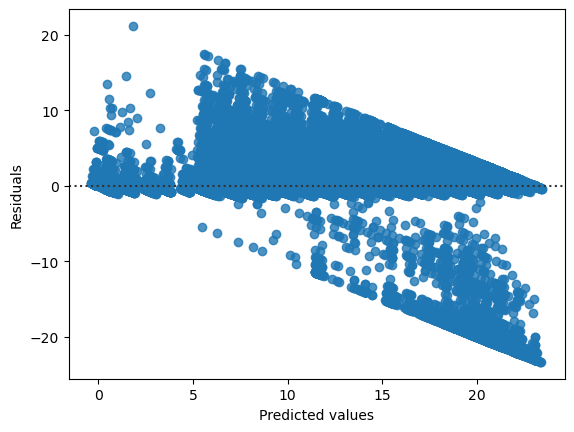

In [10]:
# Create a residual plot
sns.residplot(y_pred_arr, y_arr_delay)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

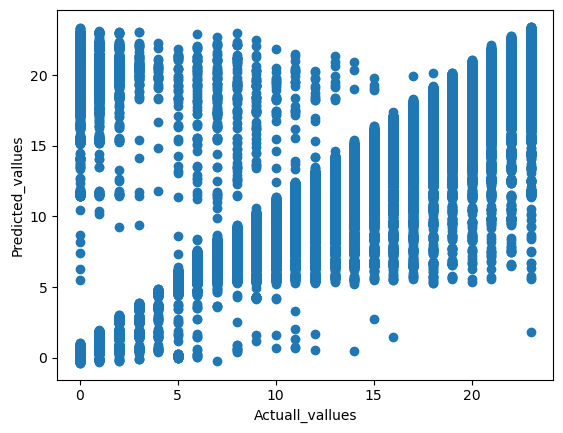

In [11]:
#scatter plot of two arrays: y_arr_delay, y_pred_arr.
plt.scatter(y_arr_delay, y_pred_arr)
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

In [12]:
# Calculate the mean squared error
mse_arr_train = mean_squared_error(y_arr_delay, y_arr_delay_pred)

In [13]:
# Calculate the root mean squared error
rmse_arr_train = np.sqrt(mse_arr_train)

In [14]:
# Calculate the R-squared score
r2_arr_train = r2_score(y_arr_delay, y_arr_delay_pred)

In [15]:
print("Arrival delay - Mean Squared Error: ", mse_arr_train)
print("Arrival delay - Root Mean Squared Error: ", rmse_arr_train)
print("Arrival delay - R-squared score: ", r2_arr_train)

Arrival delay - Mean Squared Error:  3.768411755993395
Arrival delay - Root Mean Squared Error:  1.941239747170193
Arrival delay - R-squared score:  0.8366159249883893


In [5]:
# Load the tuning data from the CSV file
tuning_data = pd.read_csv('tuning_flight_data11.csv')

In [17]:
# Separate the features and target variables
X_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [18]:
# Evaluate the models on the tuning set
y_tuning_arr_pred = reg_arr.predict(X_tuning)

In [19]:
# Calculate the mean squared error
mse_arrival = mean_squared_error(y_tuning_arr_delay, y_tuning_arr_pred)

In [20]:
# Calculate the root mean squared error
rmse_arrival = np.sqrt(mse_arrival)

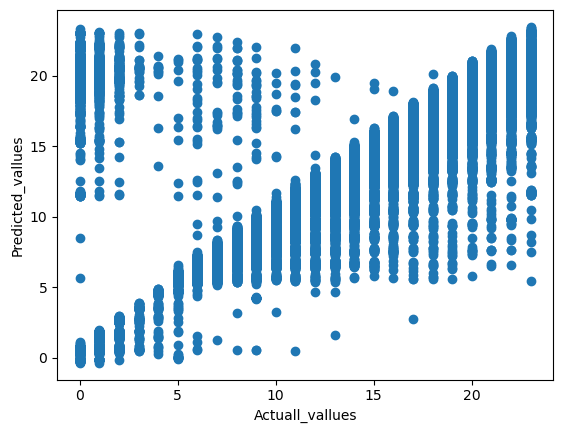

In [21]:
# scatter plot of two arrays: y_tuning_arr_delay and y_tuning_arr_pred.
plt.scatter(y_tuning_arr_delay, y_tuning_arr_pred)
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

In [22]:
# Calculate the R-squared score
r2_arrival = r2_score(y_tuning_arr_delay, y_tuning_arr_pred)

In [23]:
print("Arrival delay - Mean Squared Error: ", mse_arrival)
print("Arrival delay - Root Mean Squared Error: ", rmse_arrival)
print("Arrival delay - R-squared score: ", r2_arrival)

Arrival delay - Mean Squared Error:  3.8141767519656544
Arrival delay - Root Mean Squared Error:  1.9529917439573712
Arrival delay - R-squared score:  0.8347791156379682


In [4]:
# Load the test data from the CSV file
test_data = pd.read_csv('test_flight_data11.csv')

In [25]:
# Separate the features and target variables
X_test = test_data.drop(['ARRIVAL_DELAY'], axis=1)
y_test_arr_delay = test_data['ARRIVAL_DELAY']


In [26]:
# Make predictions using the trained model
y_test_arr_pred = reg_arr.predict(X_test)

In [27]:
# Calculate the mean squared error
mse_test_arrival = mean_squared_error(y_test_arr_delay, y_test_arr_pred)

In [28]:
# Calculate the root mean squared error
rmse_test_arrival = np.sqrt(mse_test_arrival)

In [29]:
# Calculate the R-squared score
r2_test_arrival = r2_score(y_test_arr_delay, y_test_arr_pred)

In [30]:
print("Arrival delay - Mean Squared Error (Test set): ", mse_test_arrival)
print("Arrival delay - Root Mean Squared Error (Test set): ", rmse_test_arrival)
print("Arrival delay - R-squared score (Test set): ", r2_test_arrival)

Arrival delay - Mean Squared Error (Test set):  3.805905503753083
Arrival delay - Root Mean Squared Error (Test set):  1.9508730106680656
Arrival delay - R-squared score (Test set):  0.8354907243276193


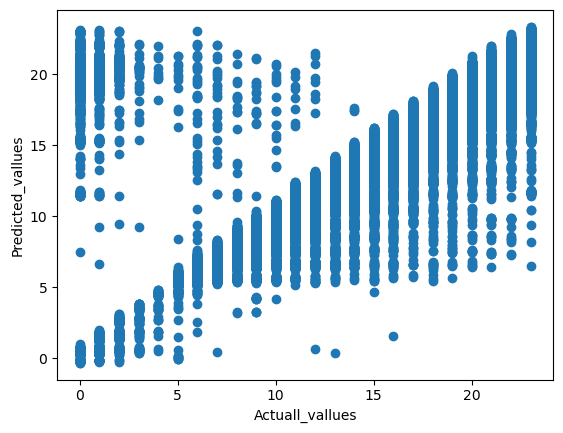

In [31]:
# scatter plot of two arrays: y_test_arr_delay and y_test_arr_pred.
plt.scatter(y_test_arr_delay, y_test_arr_pred)
plt.xlabel('Actuall_vallues')
plt.ylabel('Predicted_vallues')
plt.show()

# Suport Vector Regression- LinearSVR-

In [32]:
# Separate the features and target variables
X_v_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_arr_delay = train_data['ARRIVAL_DELAY']

In [33]:
# Train a LinearSVR model for predicting arrival delay
reg_v_arr = LinearSVR(random_state=42).fit(X_v_train, y_v_arr_delay)

In [34]:
# Separate the features and target variables
X_v_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [35]:
# Evaluate the model on the tuning set
y_v_tuning_pred = reg_v_arr.predict(X_v_tuning)

In [36]:
# Calculate the mean squared error
mse_v_tuning = mean_squared_error(y_v_tuning_arr_delay, y_v_tuning_pred)

In [37]:
# Calculate the root mean squared error
rmse_v_tuning = np.sqrt(mse_v_tuning)

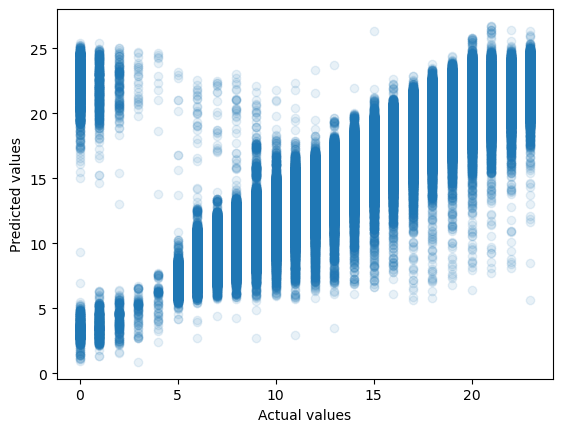

In [38]:
# Plot the predicted values against the actual values
plt.scatter(y_v_tuning_arr_delay, y_v_tuning_pred, alpha=0.1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [39]:
# Calculate the R-squared score
r2_v_tuning = r2_score(y_v_tuning_arr_delay, y_v_tuning_pred)

print("Arrival delay - Mean Squared Error: ", mse_v_tuning)
print("Arrival delay - Root Mean Squared Error: ", rmse_v_tuning)
print("Arrival delay - R-squared score: ", r2_v_tuning)

Arrival delay - Mean Squared Error:  6.462677623321718
Arrival delay - Root Mean Squared Error:  2.5421796992584373
Arrival delay - R-squared score:  0.7200524826958667


In [40]:
# Separate the features and target variables for the test set
X_v_test = test_data.drop(['ARRIVAL_DELAY'], axis=1)
y_v_test_arr_delay = test_data['ARRIVAL_DELAY']

In [41]:
# Make predictions on the test set using the trained model
y_v_test_pred = reg_v_arr.predict(X_v_test)

In [42]:
# Calculate the mean squared error on the test set
mse_v_test = mean_squared_error(y_v_test_arr_delay, y_v_test_pred)

# Calculate the root mean squared error on the test set
rmse_v_test = np.sqrt(mse_v_test)

# Calculate the R-squared score on the test set
r2_v_test = r2_score(y_v_test_arr_delay, y_v_test_pred)

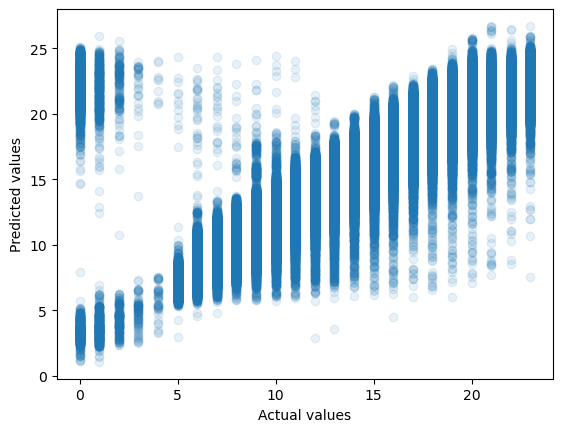

In [45]:
# Plot the predicted values against the actual values
plt.scatter(y_v_test_arr_delay, y_v_test_pred, alpha=0.1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [43]:
# Print the evaluation metrics for the test set
print("Arrival delay - Mean Squared Error (Test set): ", mse_v_test)
print("Arrival delay - Root Mean Squared Error (Test set): ", rmse_v_test)
print("Arrival delay - R-squared score (Test set): ", r2_v_test)

Arrival delay - Mean Squared Error (Test set):  6.46089379833916
Arrival delay - Root Mean Squared Error (Test set):  2.5418288294728186
Arrival delay - R-squared score (Test set):  0.7207295457249722


# Deciscion Trees

In [9]:
# Separate the features and target variables
X_t_train = train_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_arr_delay = train_data['ARRIVAL_DELAY']

In [10]:
X_t_tuning = tuning_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_tuning_arr_delay = tuning_data['ARRIVAL_DELAY']

In [11]:
# Create a decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

In [12]:
# Train the model on the training set
tree_reg.fit(X_t_train, y_t_arr_delay)

DecisionTreeRegressor(random_state=42)

In [13]:
# Make predictions on the training set
y_t_arr_delay_pred = tree_reg.predict(X_t_train)

In [14]:
# Evaluate the model on the tuning set
y_t_tuning_arr_pred = tree_reg.predict(X_t_tuning)

In [15]:
# Calculate the mean squared error and R-squared score on the training set
mse_t_train = mean_squared_error(y_t_arr_delay, y_t_arr_delay_pred)
r2_t_train = r2_score(y_t_arr_delay, y_t_arr_delay_pred)

In [16]:
print("Decision tree regression - training set:")
print("Mean Squared Error:", mse_t_train)
print("R-squared score:", r2_t_train)

Decision tree regression - training set:
Mean Squared Error: 0.005439482255793138
R-squared score: 0.9997641646310302


In [17]:
# Calculate the mean squared error and R-squared score on the tuning set
mse_t_tuning = mean_squared_error(y_t_tuning_arr_delay, y_t_tuning_arr_pred)
r2_t_tuning = r2_score(y_t_tuning_arr_delay, y_t_tuning_arr_pred)

In [18]:
print("Decision tree regression - tuning set:")
print("Mean Squared Error:", mse_t_tuning)
print("R-squared score:", r2_t_tuning)

Decision tree regression - tuning set:
Mean Squared Error: 5.897763318193125
R-squared score: 0.7445232000096378


In [19]:
# Separate the features and target variables
X_t_test = test_data.drop(['ARRIVAL_DELAY'], axis=1)
y_t_test_arr_delay = test_data['ARRIVAL_DELAY']

In [20]:
# Make predictions on the test set
y_t_test_arr_delay_pred = tree_reg.predict(X_t_test)

In [21]:
# Calculate the mean squared error and R-squared score on the test set
mse_t_test = mean_squared_error(y_t_test_arr_delay, y_t_test_arr_delay_pred)
r2_t_test = r2_score(y_t_test_arr_delay, y_t_test_arr_delay_pred)

In [22]:
print("Decision tree regression - test set:")
print("Mean Squared Error:", mse_t_test)
print("R-squared score:", r2_t_test)

Decision tree regression - test set:
Mean Squared Error: 5.987808657957149
R-squared score: 0.7411785278919925
